In [22]:
import pandas as pd
import numpy as np
import scanpy as sc
import pickle as pkl

import matplotlib.pyplot as plt

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=100, facecolor='white')

scanpy==1.7.2 anndata==0.7.8 umap==0.5.3 numpy==1.19.5 scipy==1.5.3 pandas==1.1.5 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.6


In [3]:
path = "/home/unix/sjohri/valab_sjohri/projects/github_code/beanie-analysis/"

In [4]:
adata1 = sc.read_10x_h5(path+"/data/brca/bassez_2021/1863-counts_cells_cohort1.h5")
adata1.obs = pd.read_csv(path+"/data/brca/bassez_2021/raw_data/1872-BIOKEY_metaData_cohort1_web.csv", index_col=0)
adata1

reading /home/unix/sjohri/valab_sjohri/projects/github_code/beanie-analysis//data/brca/bassez_2021/1863-counts_cells_cohort1.h5
 (0:00:13)


AnnData object with n_obs × n_vars = 175942 × 25288
    obs: 'nCount_RNA', 'nFeature_RNA', 'patient_id', 'timepoint', 'expansion', 'BC_type', 'cellType', 'cohort'
    var: 'gene_ids'

In [5]:
adata_concat = adata1[(adata1.obs.cellType=="Cancer_cell") & (adata1.obs.timepoint=="On") & (adata1.obs.BC_type.isin(["ER+","TNBC"]))]

In [6]:
adata_concat.obs["group_id"] = "NA"
adata_concat.obs.group_id = adata_concat.obs.BC_type

dict_map = {"ER+":"ER","TNBC":"TNBC"}
adata_concat.obs["sample_id"] = "NA"
adata_concat.obs.sample_id = adata_concat.obs.patient_id + "_" + adata_concat.obs.BC_type.map(dict_map) + "_" + "anti_PD1"
adata_concat

Trying to set attribute `.obs` of view, copying.


AnnData object with n_obs × n_vars = 24217 × 25288
    obs: 'nCount_RNA', 'nFeature_RNA', 'patient_id', 'timepoint', 'expansion', 'BC_type', 'cellType', 'cohort', 'group_id', 'sample_id'
    var: 'gene_ids'

In [7]:
adata_concat.obs

,nCount_RNA,nFeature_RNA,patient_id,timepoint,expansion,BC_type,cellType,cohort,group_id,sample_id
Cell,,,,,,,,,,
BIOKEY_10_On_AAACCTGTCAACACCA-1,4188,1446,BIOKEY_10,On,E,TNBC,Cancer_cell,treatment_naive,TNBC,BIOKEY_10_TNBC_anti_PD1
BIOKEY_10_On_AAACCTGTCTGAGGGA-1,418,286,BIOKEY_10,On,E,TNBC,Cancer_cell,treatment_naive,TNBC,BIOKEY_10_TNBC_anti_PD1
BIOKEY_10_On_AAACGGGGTCTGCAAT-1,1405,847,BIOKEY_10,On,E,TNBC,Cancer_cell,treatment_naive,TNBC,BIOKEY_10_TNBC_anti_PD1
BIOKEY_10_On_AAACGGGTCCTCAATT-1,463,352,BIOKEY_10,On,E,TNBC,Cancer_cell,treatment_naive,TNBC,BIOKEY_10_TNBC_anti_PD1
BIOKEY_10_On_AAACGGGTCTCTTATG-1,807,274,BIOKEY_10,On,E,TNBC,Cancer_cell,treatment_naive,TNBC,BIOKEY_10_TNBC_anti_PD1
...,...,...,...,...,...,...,...,...,...,...
BIOKEY_24_On_TTTGGTTCAAGCGAGT-1,24531,4789,BIOKEY_24,On,NE,ER+,Cancer_cell,treatment_naive,ER+,BIOKEY_24_ER_anti_PD1
BIOKEY_24_On_TTTGGTTGTCCGAATT-1,24169,5833,BIOKEY_24,On,NE,ER+,Cancer_cell,treatment_naive,ER+,BIOKEY_24_ER_anti_PD1
BIOKEY_24_On_TTTGTCAAGCGTAGTG-1,827,484,BIOKEY_24,On,NE,ER+,Cancer_cell,treatment_naive,ER+,BIOKEY_24_ER_anti_PD1


In [8]:
adata_concat.obs.group_id.value_counts()

TNBC    12309
ER+     11908
Name: group_id, dtype: int64

In [9]:
adata_concat.obs.sample_id.value_counts()

BIOKEY_26_TNBC_anti_PD1    5401
BIOKEY_21_ER_anti_PD1      3580
BIOKEY_30_ER_anti_PD1      2383
BIOKEY_16_TNBC_anti_PD1    1380
BIOKEY_17_ER_anti_PD1      1343
BIOKEY_24_ER_anti_PD1      1085
BIOKEY_31_TNBC_anti_PD1    1065
BIOKEY_1_TNBC_anti_PD1      991
BIOKEY_19_TNBC_anti_PD1     774
BIOKEY_10_TNBC_anti_PD1     556
BIOKEY_3_ER_anti_PD1        540
BIOKEY_15_TNBC_anti_PD1     536
BIOKEY_7_ER_anti_PD1        525
BIOKEY_2_TNBC_anti_PD1      474
BIOKEY_4_ER_anti_PD1        458
BIOKEY_6_ER_anti_PD1        424
BIOKEY_20_ER_anti_PD1       386
BIOKEY_14_TNBC_anti_PD1     332
BIOKEY_18_ER_anti_PD1       330
BIOKEY_12_ER_anti_PD1       295
BIOKEY_22_ER_anti_PD1       286
BIOKEY_11_TNBC_anti_PD1     259
BIOKEY_9_TNBC_anti_PD1      254
BIOKEY_8_TNBC_anti_PD1      251
BIOKEY_27_ER_anti_PD1       192
BIOKEY_29_ER_anti_PD1        67
BIOKEY_25_TNBC_anti_PD1      36
BIOKEY_5_ER_anti_PD1         14
Name: sample_id, dtype: int64

In [10]:
#Normalize gene counts
sc.pp.normalize_total(adata_concat, target_sum=1e6)

# Logarithmize the data.
sc.pp.log1p(adata_concat)

#Store raw data, for finding markers in each cluster and other analysis
adata_concat.raw = adata_concat

normalizing counts per cell
    finished (0:00:00)


If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


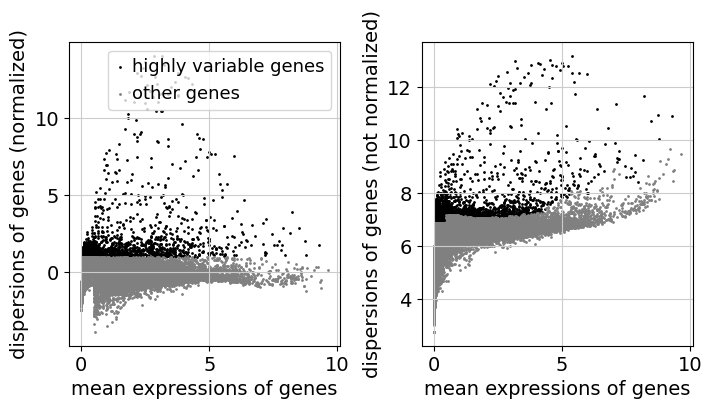

Highly variable genes: 2500


In [11]:
#variable genes for the full dataset
sc.pp.highly_variable_genes(adata_concat, n_top_genes=2500)
sc.pl.highly_variable_genes(adata_concat)

print("Highly variable genes: %d"%sum(adata_concat.var.highly_variable))
var_genes_all = adata_concat.var.highly_variable
adata_concat = adata_concat[:,var_genes_all]

In [12]:
sc.pp.scale(adata_concat, max_value=10)

/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/scanpy/preprocessing/_simple.py:845: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


computing PCA
    on highly variable genes
    with n_comps=100
    finished (0:00:12)


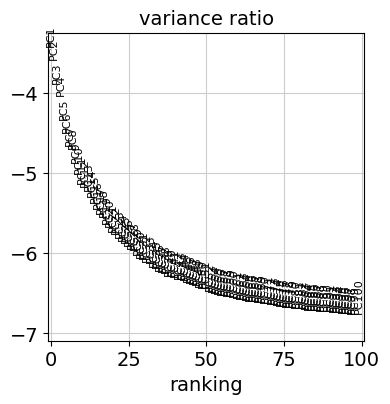

In [13]:
# Set seed
import random
initialization = 3120
random.seed(initialization)

sc.pp.pca(adata_concat, random_state=initialization, svd_solver='arpack', n_comps=100)
sc.pl.pca_variance_ratio(adata_concat, n_pcs= 100, log=True, show = True)
# sc.pl.pca_overview(adata_concat,color="n_genes")

In [14]:
sc.external.pp.harmony_integrate(adata_concat, key=["sample_id"],
                                 random_state=initialization, max_iter_harmony=50)
adata_concat.obsm['X_pca'] = adata_concat.obsm['X_pca_harmony']

2024-11-13 17:03:56,744 - harmonypy - INFO - Iteration 1 of 50
2024-11-13 17:04:09,974 - harmonypy - INFO - Iteration 2 of 50
2024-11-13 17:04:22,822 - harmonypy - INFO - Converged after 2 iterations


In [15]:
npc = 100
sc.pp.neighbors(adata_concat, random_state=initialization, n_neighbors=500, n_pcs=npc)
sc.tl.leiden(adata_concat, random_state=initialization, resolution=0.2)
sc.tl.umap(adata_concat, random_state=initialization, min_dist=0.2)

computing neighbors
    using 'X_pca' with n_pcs = 100
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:19:14)
running Leiden clustering
    finished: found 5 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:01:19)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:00)


... storing 'patient_id' as categorical
... storing 'timepoint' as categorical
... storing 'expansion' as categorical
... storing 'BC_type' as categorical
... storing 'cellType' as categorical
... storing 'cohort' as categorical
... storing 'group_id' as categorical
... storing 'sample_id' as categorical


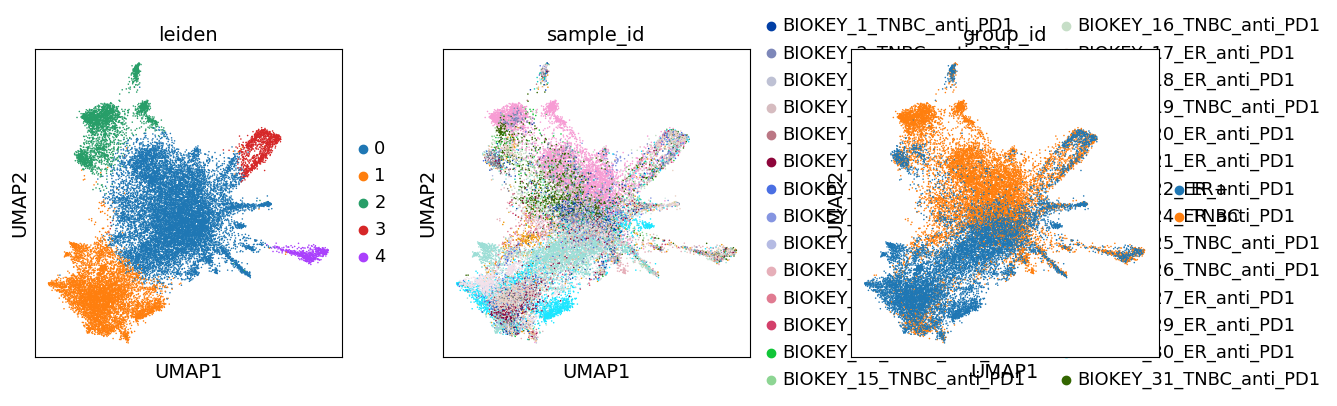

In [16]:
sc.pl.umap(adata_concat, color=['leiden', 'sample_id', 'group_id'], show = True)

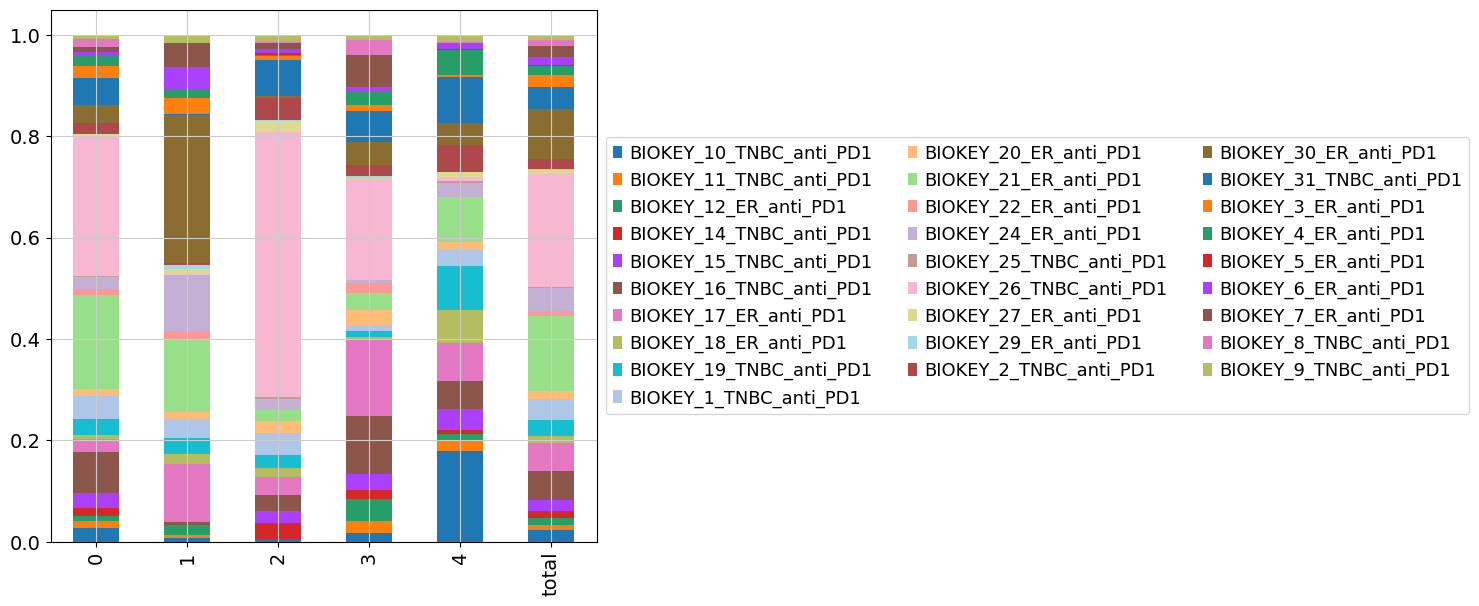

In [17]:
leiden_prop = dict()
no_clusters = len(adata_concat.obs['leiden'].unique())
for sn in adata_concat.obs['sample_id'].unique():
    temp = adata_concat[adata_concat.obs['sample_id'] == sn,:]
    cell_count = temp.obs['leiden'].value_counts()
    cell_count = cell_count.sort_index()
    cell_count = cell_count.to_dict()
    cell_count = [cell_count[str(x)] if str(x) in cell_count.keys() else 0 for x in range(0,no_clusters)]
    leiden_prop[sn] = cell_count
    
leiden_prop = pd.DataFrame(leiden_prop).T

leiden_prop['total'] = leiden_prop.sum(axis = 1)
leiden_prct = pd.DataFrame()
for x in leiden_prop.columns:
    leiden_prct[x] = leiden_prop[x]/leiden_prop[x].sum()
leiden_prct = leiden_prct.sort_index()

leiden_prct.T.plot.bar(stacked=True, legend = False,figsize=(7,7))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol = 3)

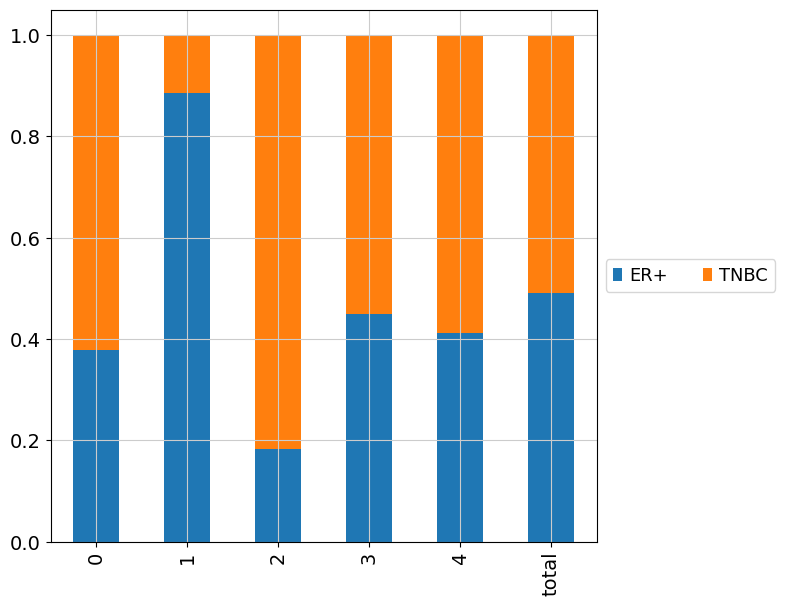

In [18]:
leiden_prop = dict()
no_clusters = len(adata_concat.obs['leiden'].unique())
for sn in adata_concat.obs['group_id'].unique():
    temp = adata_concat[adata_concat.obs['group_id'] == sn,:]
    cell_count = temp.obs['leiden'].value_counts()
    cell_count = cell_count.sort_index()
    cell_count = cell_count.to_dict()
    cell_count = [cell_count[str(x)] if str(x) in cell_count.keys() else 0 for x in range(0,no_clusters)]
    leiden_prop[sn] = cell_count
    
leiden_prop = pd.DataFrame(leiden_prop).T

leiden_prop['total'] = leiden_prop.sum(axis = 1)
leiden_prct = pd.DataFrame()
for x in leiden_prop.columns:
    leiden_prct[x] = leiden_prop[x]/leiden_prop[x].sum()
leiden_prct = leiden_prct.sort_index()

leiden_prct.T.plot.bar(stacked=True, legend = False,figsize=(7,7))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol = 3)

In [20]:
sc.tl.rank_genes_groups(adata_concat, 'leiden', method='wilcoxon', corr_method="benjamini-hochberg")

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:43)


In [21]:
adata_concat.write_h5ad("./inputs/analysis_3/adata_full.h5ad")

In [23]:
dmap_brca = pkl.load(open("brca_sampleid_map.pkl","rb"))
adata_concat.obs.sample_id = adata_concat.obs.sample_id.map(dmap_brca)

cluster_ids = sorted(set(adata_concat.obs.leiden))
for idx in cluster_ids:
    # save non log-normalized counts (set normalized=False in BEANIE)
    adata1[adata_concat[adata_concat.obs.leiden==idx].obs.index,].write_h5ad(f"./inputs/analysis_3/ts{int(idx)+1}_adata.h5ad")
    adata_concat[adata_concat.obs.leiden==idx].obs[["sample_id","group_id"]].to_csv(f"./inputs/analysis_3/ts{int(idx)+1}_metad.csv")

/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/anndata/_core/anndata.py:1229: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'patient_id' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'timepoint' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'expansion' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'BC_type' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'cellType' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'cohort' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'patient_id' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'timepoint' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'expans

In [24]:
adata_concat.obs.leiden.value_counts()

0    13675
1     6254
2     2676
3     1006
4      606
Name: leiden, dtype: int64